In [1]:
import pandas as pd

# Time series with pandas

## Datetimes

The built-in library `datetime` comes with two useful submodules: `datetime` and `timedelta`. It can be used to get:

- An arbitrary date, e.g. May 15, 2021
- An arbitrary date and time, e.g. May 15, 2021 07:23:44
- The current date and time
- Yesterday's date and time (current date minus one day)

In [2]:
from datetime import datetime, timedelta


# Arbitrary date
print('Arbitrary date: ', end=' ')
print(datetime(year=2021, month=5, day=15))

# Arbitary date and time
print('Date and time:  ', end=' ')
print(datetime(year=2021, month=5, day=15, hour=7, minute=23, second=44))

# Now
print('Date right now: ', end=' ')
print(datetime.now())

# Yesterday
print('Date yesterday: ', end=' ')
print(datetime.now() - timedelta(days=1))

Arbitrary date:  2021-05-15 00:00:00
Date and time:   2021-05-15 07:23:44
Date right now:  2023-02-02 01:00:05.796685
Date yesterday:  2023-02-01 01:00:05.797683


In addition, it can also be used to extract specific information from datetime values 

In [3]:
now = datetime.now()
print(now.year, now.month, now.day, now.hour, now.minute, now.second)

2023 2 2 1 0 5


## Date Ranges

Different methods exist for handling date ranges in Python, such as using Pure Python (lists, etc.) or NumPy and Pandas. However, this lesson will focus only on Pandas

There are options to specify a date range in Pandas: the first and most common is to provide the start and end dates and let Pandas do the rest.

In [4]:
import pandas as pd

#Similar to range(start,end)
date_list = pd.date_range(start='2021-07-01', end='2021-07-05')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05'],
              dtype='datetime64[ns]', freq='D')

Using starting date only. This requires two extra parameters:

- periods: int – the number of periods in the date range, including the starting value.
- freq: str – the interval level.

In [5]:
date_list = pd.date_range(start='2021-07-01', periods=10, freq='D')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10'],
              dtype='datetime64[ns]', freq='D')

The other great thing about Pandas is that functions like min() and max() can be used directly on date ranges. For example:

In [6]:

print(f'Minimum date: {date_list.min()}')
print(f'Maximum date: {date_list.max()}')

Minimum date: 2021-07-01 00:00:00
Maximum date: 2021-07-10 00:00:00


## Pandas functions 

Pandas can be used to manipulate time series data, such as converting daily intervals to monthly totals, etc. 

Use the light weight vehicle sales dataset from <a href="https://fred.stlouisfed.org/series/LTOTALNSA">FRED</a>. Load the dataset using Pandas

In [7]:
df = pd.read_csv('data/LTOTALNSA.csv', index_col='DATE', parse_dates=True)
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


### Resampling
Resampling is used to alter the aggregation level of a time series. For instance, if one has data collected in hourly intervals but needs daily totals for analysis, resampling is the solution.

The code snippet below resamples the monthly dataset to yearly totals:

In [8]:
yearly_totals = df.resample(rule='Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


All the other aggregation functions are available in the Pandas documentation.  

For example, to get the quarterly mean, use the following code:

In [9]:
quarterly_means = df.resample(rule='Q').mean()
quarterly_means.head()

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


Important:  It's easy to convert monthly data to yearly data, but it's impossible to do the opposite.

### Shifting
The shift() function in Pandas is used to move the entire series up or down by the desired number of periods. 

The following code snippet shifts the series down by one and two periods, storing the shifted versions as additional columns:

In [10]:
df_shift = df.copy()
df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)
df_shift.head()

,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


Notice how the first one or two rows are missing, since no records before 1976-01-01 are available.

The same can be done at the other end of the dataset. There is no unshift function, so you must shift the series by a negative value.

In [11]:
df_shift = df.copy()
df_shift['Shift_Neg1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Shift_Neg2'] = df_shift['LTOTALNSA'].shift(-2)
df_shift.tail()

,LTOTALNSA,Shift_Neg1,Shift_Neg2
DATE,,,
2022-08-01,1134.266,1124.206,1176.991
2022-09-01,1124.206,1176.991,1125.616
2022-10-01,1176.991,1125.616,1263.268
2022-11-01,1125.616,1263.268,NaN
2022-12-01,1263.268,NaN,NaN


### Rolling
Time series data can be volatile, so rolling averages are a good technique to smooth it out.

To calculate quarterly & yearly averages from the original series:

In [12]:
df_rolling = df.copy()
df_rolling['QuarterRolling'] = df_rolling['LTOTALNSA'].rolling(window=3).mean()
df_rolling['YearRolling'] = df_rolling['LTOTALNSA'].rolling(window=12).mean()
df_rolling.head(15)

,LTOTALNSA,QuarterRolling,YearRolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


The values become much more similar after calculating moving averages.

### Differencing
An essential technique when working with financial data, such as stock prices, to calculate returns. Differencing is generally used to make the series stationary.
Here's how to calculate first and second order differences, with explanations in the comments:

In [13]:

df_diff = df.copy()
df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods=1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods=2)
df_diff.head()

,LTOTALNSA,Diff_1,Diff_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,108.7,NaN
1976-03-01,1216.1,242.8,351.5
1976-04-01,1163.2,-52.9,189.9
1976-05-01,1176.1,12.9,-40.0


## Visualization


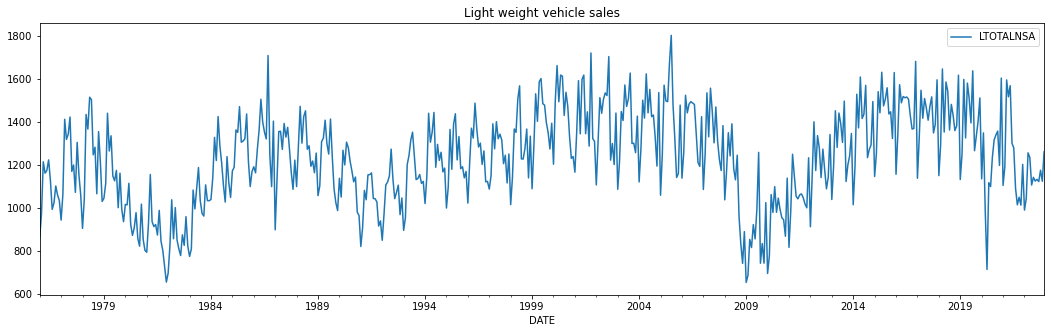

In [14]:

df.plot(figsize=(18, 5), title='Light weight vehicle sales');